In [5]:
#imports
from functions import brightest_pixel, trim, blurring, compare_plots, one_plot
from imports import load_images
import numpy as np
from PIL import Image
import skimage
from skimage import filters
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.decomposition import PCA

In [2]:
#data loading for experiment 57
image_matrix = compare_plots("data/exp57/control/", 'data/exp57/Treated/')

/home/ehunter/ClusterAnalysis/deposit-analysis/functions.py:13: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  bw_image = rgb2gray(image)


Text(0.5, 0, 'Number of Components')

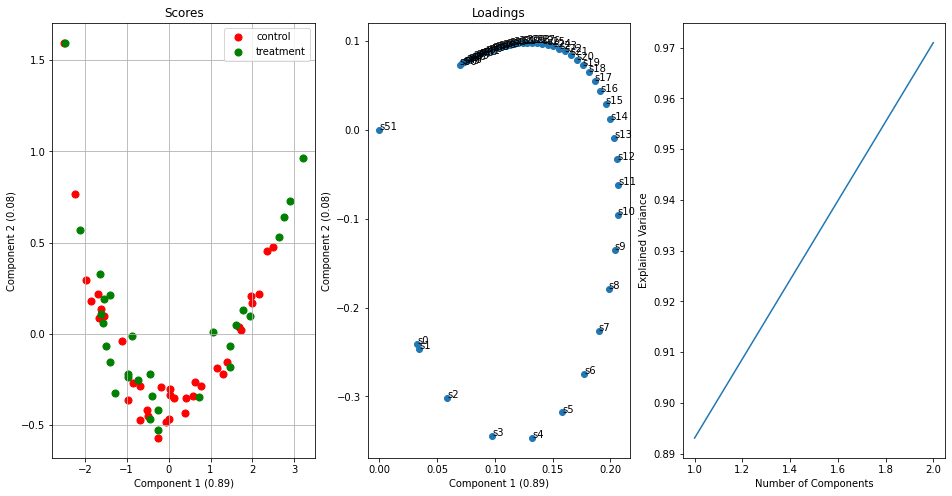

In [6]:
# PCA scores and loadings (exp57)
import pandas as pd

df = pd.DataFrame(image_matrix, columns = ['s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19','s20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's39', 's40', 's41', 's42', 's43', 's44', 's45', 's46', 's47', 's48', 's49','s50','s51'])
pca = PCA(n_components=2)
data = pca.fit_transform(df)
data_new = pd.DataFrame(data = data
             , columns = ['principal component 1', 'principal component 2'])
target = ['control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment','treatment',]
data_new['Target'] = target

fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,3,1) 
ax2 =fig.add_subplot(1,3,2)
ax3= fig.add_subplot(1,3,3)

ax1.set_title("Scores")
ax1.set_xlabel("Component 1 ({ratio:.2f})".format(ratio=pca.explained_variance_ratio_[0]))
ax1.set_ylabel("Component 2 ({ratio:.2f})".format(ratio=pca.explained_variance_ratio_[1]))

targets = ['control', 'treatment']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data_new['Target'] == target
    ax1.scatter(data_new.loc[indicesToKeep, 'principal component 1']
               , data_new.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()

l = ['s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19','s20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's39', 's40', 's41', 's42', 's43', 's44', 's45', 's46', 's47', 's48', 's49','s50','s51']
loadings = pd.DataFrame(pca.components_.T[:, :2], columns=['PC1', 'PC2'], index=l)
ax2.scatter(loadings.iloc[:, 0], loadings.iloc[:, 1])
ax2.set_title("Loadings")
ax2.set_xlabel("Component 1 ({ratio:.2f})".format(ratio=pca.explained_variance_ratio_[0]))
ax2.set_ylabel("Component 2 ({ratio:.2f})".format(ratio=pca.explained_variance_ratio_[1]))

for i in range(52):
    ax2.annotate(l[i], (loadings.iloc[i, 0], loadings.iloc[i, 1]))

acc_variance = pca.explained_variance_ratio_.copy()
acc_variance = np.cumsum(acc_variance)

ax3.plot(range(1, acc_variance.size + 1), acc_variance)
ax3.set_ylabel("Explained Variance")
ax3.set_xlabel("Number of Components")

# Add subplot labels


/home/ehunter/ClusterAnalysis/deposit-analysis/functions.py:13: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  bw_image = rgb2gray(image)


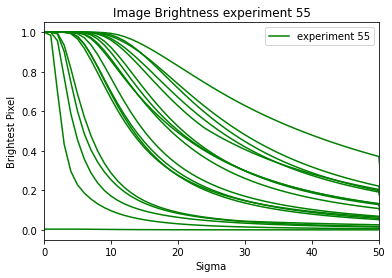

/home/ehunter/ClusterAnalysis/deposit-analysis/functions.py:13: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  bw_image = rgb2gray(image)


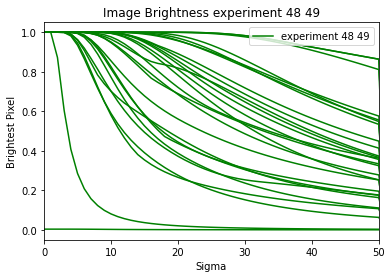

In [7]:
#generate plots
y_val55 = blurring('data/exp55/')
one_plot(y_val55, 'experiment 55')

y_val4 = blurring('data/exp48.49//')
one_plot(y_val4, 'experiment 48 49')

# question: what is being compared within ex 55 and 48/49? what are the different var groups 

/home/ehunter/ClusterAnalysis/deposit-analysis/functions.py:13: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  bw_image = rgb2gray(image)


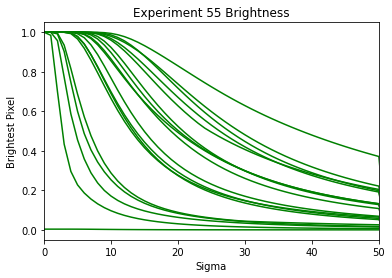

In [ ]:
%run gaussian_blur.py 
#one image from exp 55 yes theres like 20 images
#i think we want to compare treated n controlled
#treated, control, pixel brightness, blur radius <- these should b the vars